In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, SimpleRNN, GRU, LSTM, TimeDistributed, RepeatVector, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib
 
 
def readTrain():
    train = pd.read_csv("https://raw.githubusercontent.com/clalanliu/Financialhw4/main/S_P_add4feature.csv")
    return train
 
def augFeatures(train):
    train["Date"] = pd.to_datetime(train["Date"])
    train["year"] = train["Date"].dt.year
    train["month"] = train["Date"].dt.month
    train["date"] = train["Date"].dt.day
    train["day"] = train["Date"].dt.dayofweek
    return train
 
def normalize(train):
    train = train.drop(["Date"], axis=1)
    train_norm = train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    return train_norm
 
def buildTrain(train, pastDay=30, futureDay=1):
    X_train, Y_train = [], []
    for i in range(30,train.shape[0]-futureDay-pastDay):
        X_train.append(np.array(train.iloc[i:i+pastDay]))
        Y_train.append(np.array(train.iloc[i+pastDay:i+pastDay+futureDay]["Close"]))
    return np.array(X_train), np.array(Y_train)
 
def shuffle(X,Y):
    np.random.seed(10)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]
 
def splitData(X,Y,num):
    X_train = X[:num]
    Y_train = Y[:num]
    X_val = X[num:]
    Y_val = Y[num:]
    return X_train, Y_train, X_val, Y_val
 
# read SPY.csv
train = readTrain()
 
# Augment the features (year, month, date, day)
train_Aug = augFeatures(train)
 
# Normalization
train_norm = normalize(train_Aug)
 
# build Data, use last 30 days to predict next 1 days
X_train, Y_train = buildTrain(train_norm, 30, 1)
print(X_train.shape, Y_train.shape)
 
# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 6100)
 
# shuffle the data, and random seed is 10
X_train, Y_train = shuffle(X_train, Y_train)
 
 
# from 2 dimmension to 3 dimension
Y_train = Y_train[:,np.newaxis]
Y_val = Y_val[:,np.newaxis]
 
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(6484, 30, 15) (6484, 1)
(6100, 30, 15) (6100, 1, 1)
(384, 30, 15) (384, 1, 1)


In [ ]:
def readval2():
    train = pd.read_csv("https://raw.githubusercontent.com/clalanliu/Financialhw4/main/2020_S_P_add4feature.csv")
    return train

val2 = readval2()

# Augment the features (year, month, date, day)
val2 = augFeatures(val2)

# Normalization
val2 = normalize(val2)

# build Data, use last 30 days to predict next 1 days
X_val2, Y_val2 = buildTrain(val2, 30, 1)

X_val2 = np.nan_to_num(X_val2)
Y_val2 = np.nan_to_num(Y_val2)

Y_val2 = Y_val2[:,np.newaxis]

print(X_val2.shape, Y_val2.shape)

print(X_val2[33])

(184, 30, 15) (184, 1, 1)
[[-0.24180328 -0.51897416 -0.48607362 -0.47272825 -0.45431837 -0.45431837
   0.23739712 -0.56473329 -0.42015023 -0.17168626  0.02827782  0.
  -0.21521336 -0.44965986  0.24387755]
 [-0.23770492 -0.47959393 -0.48259532 -0.46998309 -0.48007455 -0.48007455
   0.17870164 -0.55005157 -0.44786179 -0.35548096 -0.17172705  0.
  -0.21521336 -0.41632653  0.49387755]
 [-0.23360656 -0.43533816 -0.38534911 -0.39453256 -0.36221557 -0.36221557
   0.2273225  -0.51598786 -0.46621029 -0.07754914 -0.20297264  0.
  -0.21521336 -0.31632653 -0.50612245]
 [-0.2295082  -0.32332299 -0.32921904 -0.33982597 -0.36509085 -0.36509085
   0.33087104 -0.49904073 -0.48151023  0.01535165 -0.14019965  0.
  -0.21521336 -0.2829932  -0.25612245]
 [-0.22540984 -0.36079638 -0.32651204 -0.33611953 -0.30410419 -0.30410419
   0.14186615 -0.47711205 -0.49346852  0.26916439  0.06944156  0.
  -0.21521336 -0.24965986 -0.00612245]
 [-0.22131148 -0.2965432  -0.28596415 -0.27090596 -0.2772773  -0.2772773
   0.4

In [ ]:
from google.colab import files

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                260       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
24/24 [==============================] - 2s 27ms/step - loss: 0.3191 - val_loss: 0.0487
Epoch 2/60
24/24 [==============================] - 0s 8ms/step - loss: 0.1115 - val_loss: 0.0530
Epoch 3/60
24/24 [==============================] - 0s 8ms/step - loss: 0.0540 - val_loss: 0.0455
Epoch 4/60
24/24 [==============================] - 0s 8ms/step - loss: 0.0332 - val_loss: 0.0339
Epoch 5/60
24/24 [==============================] - 0s 8ms/step - loss: 0.0218 - val_loss: 0.0270
Epoch 6/60
24/24 [===========

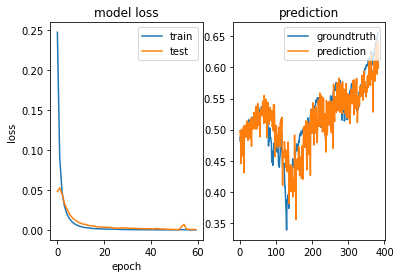

(184, 1, 1)


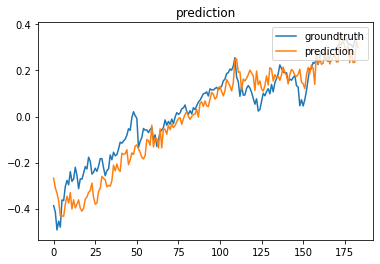

In [ ]:
def buildManyToOneModel(shape):
    model = Sequential()
    model.add(SimpleRNN(10, input_length=shape[1], input_dim=shape[2]))
    model.add(Dense(1))
    optimizer = Adam(clipvalue=0.5)
    model.compile(loss='mse', optimizer=optimizer)
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
checkpointer = ModelCheckpoint(filepath='RNN.weights.best.hdf5', verbose = 0, save_best_only=True)
history = model.fit(X_train, Y_train, epochs=60, batch_size=256, validation_data=(X_val, Y_val), callbacks=[callback, checkpointer])
score = model.evaluate(X_val, Y_val, verbose=0)
score2 = model.evaluate(X_val2, Y_val2, verbose=0)
# Print test loss
print('\n', 'Test loss:', score, score2)

prediction = model.predict(X_val, verbose=0)
prediction2 = model.predict(X_val2, verbose=0)
print(prediction.shape)
# summarize history for loss
matplotlib.pyplot.subplot(121)
matplotlib.pyplot.plot(history.history['loss'])
matplotlib.pyplot.plot(history.history['val_loss'])
matplotlib.pyplot.title('model loss')
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend(['train', 'test'], loc='upper right')

# prediction
matplotlib.pyplot.subplot(122)
matplotlib.pyplot.plot(np.squeeze(Y_val))
matplotlib.pyplot.plot(prediction)
matplotlib.pyplot.title('prediction')
matplotlib.pyplot.legend(['groundtruth', 'prediction'], loc='upper right')

matplotlib.pyplot.show()

# prediction
matplotlib.pyplot.plot(np.squeeze(Y_val2))
print(Y_val2.shape)
matplotlib.pyplot.plot(prediction2)
matplotlib.pyplot.title('prediction')
matplotlib.pyplot.legend(['groundtruth', 'prediction'], loc='upper right')

matplotlib.pyplot.show()

#files.download('RNN.weights.best.hdf5')

In [ ]:
def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(10, input_length=shape[1], input_dim=shape[2]))
    model.add(Dense(1))
    optimizer = Adam(clipvalue=0.5)
    model.compile(loss='mse', optimizer=optimizer)
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
checkpointer = ModelCheckpoint(filepath='LSTM.weights.best.hdf5', verbose = 0, save_best_only=True)
history = model.fit(X_train, Y_train, epochs=60, batch_size=256, validation_data=(X_val, Y_val), callbacks=[callback, checkpointer])
score = model.evaluate(X_val, Y_val, verbose=0)
score2 = model.evaluate(X_val2, Y_val2, verbose=0)
# Print test loss
print('\n', 'Test loss:', score, score2)

prediction = model.predict(X_val, verbose=0)
prediction2 = model.predict(X_val2, verbose=0)
print(prediction.shape)
# summarize history for loss
matplotlib.pyplot.subplot(121)
matplotlib.pyplot.plot(history.history['loss'])
matplotlib.pyplot.plot(history.history['val_loss'])
matplotlib.pyplot.title('model loss')
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend(['train', 'test'], loc='upper right')

# prediction
matplotlib.pyplot.subplot(122)
matplotlib.pyplot.plot(np.squeeze(Y_val))
matplotlib.pyplot.plot(prediction)
matplotlib.pyplot.title('prediction')
matplotlib.pyplot.legend(['groundtruth', 'prediction'], loc='upper right')

matplotlib.pyplot.show()

# prediction
matplotlib.pyplot.plot(np.squeeze(Y_val2))
matplotlib.pyplot.plot(prediction2)
matplotlib.pyplot.title('prediction')
matplotlib.pyplot.legend(['groundtruth', 'prediction'], loc='upper right')

matplotlib.pyplot.show()

#files.download('LSTM.weights.best.hdf5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
24/24 [==============================] - 2s 32ms/step - loss: 0.0275 - val_loss: 0.0286
Epoch 2/60
24/24 [==============================] - 0s 14ms/step - loss: 0.0065 - val_loss: 0.0088
Epoch 3/60
24/24 [==============================] - 0s 15ms/step - loss: 0.0032 - val_loss: 0.0089
Epoch 4/60
24/24 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 0.0069
Epoch 5/60
24/24 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 6/60
24/24 [=

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, 10)                810       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total params: 821
Trainable params: 821
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
24/24 [==============================] - 2s 35ms/step - loss: 0.0301 - val_loss: 0.0199
Epoch 2/60
24/24 [==============================] - 0s 17ms/step - loss: 0.0095 - val_loss: 0.0138
Epoch 3/60
24/24 [==============================] - 0s 18ms/step - loss: 0.0033 - val_loss: 0.0047
Epoch 4/60
24/24 [==============================] - 0s 18ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 5/60
24/24 [==============================] - 0s 18ms/step - loss: 5.3653e-04 - val_loss: 0.0022
Epoch 6/60
24/24 [

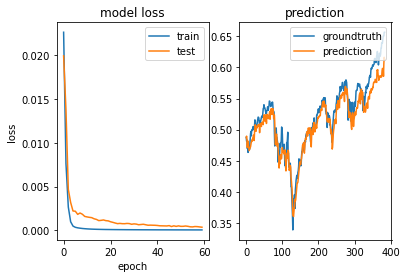

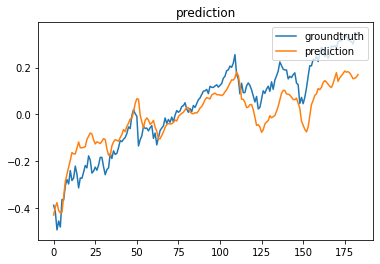

In [ ]:
def buildManyToOneModel(shape):
    model = Sequential()
    model.add(GRU(10, input_length=shape[1], input_dim=shape[2]))
    model.add(Dense(1))
    optimizer = Adam(clipvalue=0.5)
    model.compile(loss='mse', optimizer=optimizer)
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
checkpointer = ModelCheckpoint(filepath='GRU.weights.best.hdf5', verbose = 0, save_best_only=True)
history = model.fit(X_train, Y_train, epochs=60, batch_size=256, validation_data=(X_val, Y_val), callbacks=[callback, checkpointer])
score = model.evaluate(X_val, Y_val, verbose=0)
score2 = model.evaluate(X_val2, Y_val2, verbose=0)
# Print test loss
print('\n', 'Test loss:', score, score2)

prediction = model.predict(X_val, verbose=0)
prediction2 = model.predict(X_val2, verbose=0)
print(prediction.shape)
# summarize history for loss
matplotlib.pyplot.subplot(121)
matplotlib.pyplot.plot(history.history['loss'])
matplotlib.pyplot.plot(history.history['val_loss'])
matplotlib.pyplot.title('model loss')
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend(['train', 'test'], loc='upper right')

# prediction
matplotlib.pyplot.subplot(122)
matplotlib.pyplot.plot(np.squeeze(Y_val))
matplotlib.pyplot.plot(prediction)
matplotlib.pyplot.title('prediction')
matplotlib.pyplot.legend(['groundtruth', 'prediction'], loc='upper right')

matplotlib.pyplot.show()

# prediction
matplotlib.pyplot.plot(np.squeeze(Y_val2))
matplotlib.pyplot.plot(prediction2)
matplotlib.pyplot.title('prediction')
matplotlib.pyplot.legend(['groundtruth', 'prediction'], loc='upper right')

matplotlib.pyplot.show()


#files.download('GRU.weights.best.hdf5')

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 64)                20480     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 65        
Total params: 20,545
Trainable params: 20,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 3s 147ms/step - loss: 0.0088 - val_loss: 0.0414
Epoch 2/100
12/12 [==============================] - 1s 114ms/step - loss: 0.0047 - val_loss: 0.0210
Epoch 3/100
12/12 [==============================] - 1s 113ms/step - loss: 0.0024 - val_loss: 0.0140
Epoch 4/100
12/12 [==============================] - 1s 113ms/step - loss: 0.0013 - val_loss: 0.0091
Epoch 5/100
12/12 [==============================] - 1s 111ms/step - loss: 9.1694e-04 - val_loss: 0.0064
Ep

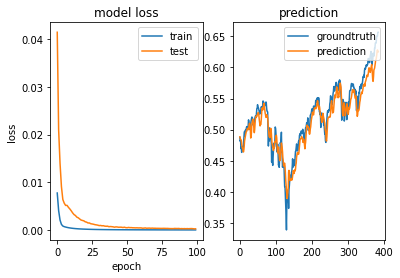

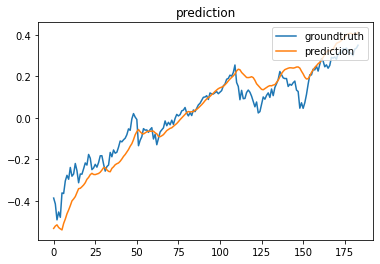

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(64, input_length=shape[1], input_dim=shape[2]))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss='mse', optimizer=optimizer)
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
checkpointer = ModelCheckpoint(filepath='Improved.weights.best.hdf5', verbose = 0, save_best_only=True)
history = model.fit(X_train, Y_train, epochs=100, batch_size=512, validation_data=(X_val, Y_val), callbacks=[callback, checkpointer])
score = model.evaluate(X_val, Y_val, verbose=0)
score2 = model.evaluate(X_val2, Y_val2, verbose=0)
# Print test loss
print('\n', 'Test loss:', score, score2)

prediction = model.predict(X_val, verbose=0)
prediction2 = model.predict(X_val2, verbose=0)
print(prediction.shape)
# summarize history for loss
matplotlib.pyplot.subplot(121)
matplotlib.pyplot.plot(history.history['loss'])
matplotlib.pyplot.plot(history.history['val_loss'])
matplotlib.pyplot.title('model loss')
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend(['train', 'test'], loc='upper right')

# prediction
matplotlib.pyplot.subplot(122)
matplotlib.pyplot.plot(np.squeeze(Y_val))
matplotlib.pyplot.plot(prediction)
matplotlib.pyplot.title('prediction')
matplotlib.pyplot.legend(['groundtruth', 'prediction'], loc='upper right')

matplotlib.pyplot.show()

# prediction
matplotlib.pyplot.plot(np.squeeze(Y_val2))
matplotlib.pyplot.plot(prediction2)
matplotlib.pyplot.title('prediction')
matplotlib.pyplot.legend(['groundtruth', 'prediction'], loc='upper right')

matplotlib.pyplot.show()


files.download('Improved.weights.best.hdf5')